In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

In [66]:
#pip install openpyxl


In [67]:
df = pd.read_excel('Opta.xls')

In [68]:
df = pd.DataFrame(df)



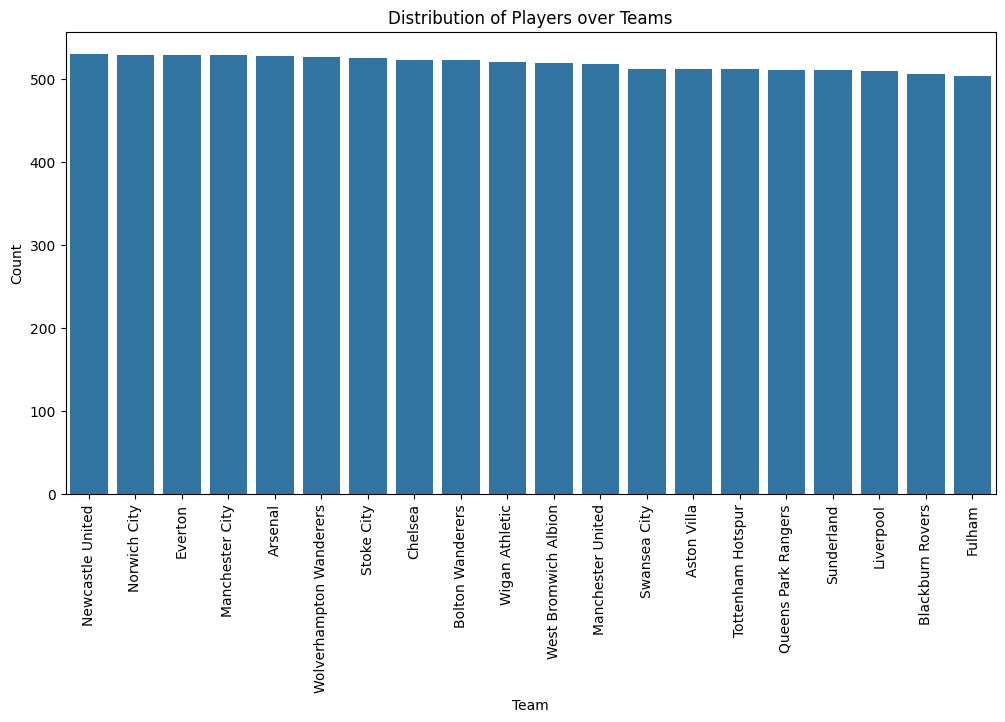

In [69]:

# Create a bar plot of the team distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Team', order=df['Team'].value_counts().index)
plt.title('Distribution of Players over Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [70]:
## Only player forename has missing values

In [71]:
missing_values = df.isnull().sum()
columns_missing = missing_values[missing_values > 0]

In [72]:
## Check which player names have a missing Player Forename
### rows_missing shows all the context for the missing player names of 'unique_missing'

In [73]:
rows_missing = df[df['Player Forename'].isnull()]
selected_clumns = ['Player ID', 'Player Surname', 'Player Forename', 'Team']
rows_missing = rows_missing[selected_clumns]
unique_missing = rows_missing['Player Surname'].unique().tolist()

In [74]:

# Filter rows with missing values in the 'Player Forename' column and unique Player Surnames
rows_to_transform = df[df['Player Forename'].isnull() & df['Player Surname'].isin(unique_missing)]

# Define a function to split names based on the cases you mentioned
def split_name(full_name):
    if ' ' not in full_name:  # Single name
        return ('', full_name)
    else:
        parts = full_name.split(' ')
        if len(parts) == 2:  # Western name
            return (parts[0], parts[1])
        else:  # Asian name
            return (parts[1], parts[0])  # Swap the positions for Asian names

# Apply the split_name function and create two new columns
split_names = rows_to_transform['Player Surname'].apply(split_name).apply(pd.Series)
split_names.columns = ['Player Forename', 'Player Surname']

# Update df with the modified rows
df.update(split_names)




In [75]:

# List of the Asian names that were swapped
specific_names = ['Ji Dong-Won', 'Lee Chung-Yong', 'Park Chu-Young', 'Park Ji-Sung']

# Iterate through the DataFrame and swap values for the specific names
for name in specific_names:
    surname, forename = name.split()
    df.loc[df['Player Surname'] == forename, 'Player Surname'], df.loc[df['Player Forename'] == surname, 'Player Forename'] = surname, forename







In [76]:
selected_columns = [
    'Player ID', 'Player Surname', 'Player Forename', 'Team', 'Position Id',
    'Time Played', 'Goals', 'Goals as a substitute', 'First Goal', 'Winning Goal',
    'Shots On Target inc goals', 'Shots Off Target inc woodwork', 'Blocked Shots',
    'Goals from Inside Box', 'Shots On from Inside Box', 'Shots Off from Inside Box',
    'Blocked Shots from Inside Box', 'Goals Open Play', 'Attempts Open Play on target',
    'Attempts Open Play off target', 'Goals from Corners', 'Attempts from Corners on target',
    'Attempts from Corners off target', 'Goals from Throws', 'Attempts from Throws on target',
    'Attempts from Throws off target', 'Goals from Set Play', 'Attempts from Set Play on target',
    'Attempts from Set Play off target', 'Goals from penalties', 'Attempts from Penalties on target',
    'Attempts from Penalties off target', 'Left Foot Goals', 'Left Foot Shots On Target',
    'Left Foot Shots Off Target', 'Left Foot Blocked Shots', 'Right Foot Goals',
    'Right Foot Shots On Target', 'Right Foot Shots Off Target', 'Right Foot Blocked Shots',
    'Other Goals', 'Other Shots On Target', 'Other Shots Off Target', 'Other Blocked Shots',
    'Shots Cleared off Line Inside Area', 'Shots Cleared off Line Outside Area',
    'Goals from Outside Box', 'Shots On Target Outside Box', 'Shots Off Target Outside Box',
    'Blocked Shots Outside Box', 'Headed Goals', 'Headed Shots On Target',
    'Headed Shots Off Target', 'Headed Blocked Shots', 'Penalties Taken', 'Penalty Goals',
    'Penalties Saved', 'Penalties Off Target', 'Penalties Not Scored', 'Direct Free-kick Goals',
    'Direct Free-kick On Target', 'Direct Free-kick Off Target', 'Blocked Direct Free-kick',
    'Goals from Direct Free Kick', 'Attempts from Direct Free Kick on target',
    'Attempts from Direct Free Kick off target'
]

# Subset the DataFrame
subset_df = df[selected_columns]



In [77]:
goal_columns = [
    'Player ID', 'Player Surname', 'Player Forename', 'Team', 'Position Id',
    'Time Played', 'Goals', 'Goals as a substitute', 'First Goal', 'Winning Goal',
    'Shots On Target inc goals', 'Goals from Inside Box', 'Goals Open Play','Goals from Corners',
    'Goals from Throws','Goals from Set Play', 'Attempts from Set Play on target',
    'Goals from penalties', 'Left Foot Goals', 'Right Foot Goals', 'Other Goals',
    'Goals from Outside Box', 'Headed Goals', 'Penalty Goals', 'Direct Free-kick Goals',
    'Goals from Direct Free Kick',
]

goals_df = df[goal_columns]


In [78]:

# List of columns to exclude from summation
exclude_columns = [
    'Index', 'Date', 'Player ID', 'Player Surname', 'Player Forename', 'Team',
    'Team Id', 'Opposition', 'Opposition id', 'Venue', 'Position Id',
    'Team Formation', 'Position in Formation', 'CompId', 'SeasId'
]

# Identify columns to sum (exclude those in the exclude_columns list)
sum_columns = [col for col in df.columns if col not in exclude_columns]

# Group by Player ID and sum the data to get stats per player for the whole season
summarized_df = df.groupby(['Player ID', 'Player Forename', 'Player Surname'])[sum_columns].sum().reset_index()




In [79]:
column_list = list(summarized_df.columns)


In [80]:
# Load the second part of the data
ylabel = pd.read_excel('Transfermarkt.xlsx')

In [81]:
# Merge names in order to merge both datasets on the full player name
summarized_df['player_name'] = summarized_df['Player Forename'] + ' ' + summarized_df['Player Surname']

In [82]:
# Some names differ, this variable contains the players where the name differs between the 2 datasets
missing_names = pd.read_excel('Missing Players.xlsx')

PermissionError: [Errno 13] Permission denied: 'Missing Players.xlsx'

In [ ]:

# Merge the dataframes based on Player Forename and Player Surname
temp_df = pd.merge(summarized_df, missing_names, on=['Player Forename', 'Player Surname'], how='left', suffixes=('', '_missing'))

# Update player_name in summarized_df with values from 'ylabel name' in missing_names
summarized_df['player_name'] = temp_df['ylabel name'].combine_first(temp_df['player_name'])






In [ ]:
# Merge summarized_df with ylabel

# Filter ylabel based on the condition season_start_year == 2011
filtered_ylabel = ylabel[ylabel['season_start_year'] == 2011]


# Merge the dataframes based on player_name and the filtered ylabel
merged_df = pd.merge(summarized_df, filtered_ylabel[['player_name', 'player_position', 'player_dob', 'player_nationality',
                                                     'player_height_mtrs', 'player_foot', 'player_market_value_euro']],
                     on='player_name', how='left')






In [ ]:
check = merged_df.isnull().sum()

In [ ]:
merged_df = merged_df.dropna(subset=['player_market_value_euro']).reset_index(drop=True)

In [ ]:
check2 = merged_df.isnull().sum()
# There are only 11 players left where there height and favorite foot are missing

In [ ]:
merged_df = merged_df.dropna(subset=['player_height_mtrs']).reset_index(drop=True)

In [ ]:
# Only show the names of players with missing values in the specified columns
missing_values_df = merged_df.loc[merged_df[['player_position', 'player_dob', 'player_nationality',
                                              'player_height_mtrs', 'player_foot', 'player_market_value_euro']].isnull().any(axis=1),
                                  ['Player Forename', 'Player Surname', 'player_position', 'player_dob',
                                   'player_nationality', 'player_height_mtrs', 'player_foot', 'player_market_value_euro']]




In [ ]:
## Adjust player position
merged_df.loc[merged_df['player_name'] == 'David Jones', 'player_position'] = 'Central Midfield'

In [ ]:
## Transform Date of Birth to Age on the end of the 2011/2012 season to use it for plots
from datetime import datetime
merged_df['player_dob'] = pd.to_datetime(merged_df['player_dob'])

end_date = datetime(2012, 5, 13)

# Age on end_date
merged_df['age'] = merged_df['player_dob'].apply(lambda dob: (end_date - dob).days // 365)

In [ ]:
# Create shots on target excl goals
merged_df['Shots on target excl goals'] = merged_df['Shots On Target inc goals'] - merged_df[ 'Goals']

In [ ]:
## The dataset is now complete. Now its time to drop columns which we dont need

In [ ]:
check = merged_df.isnull().sum()

In [ ]:
# % of 0-values per column
zero_percentage = (merged_df.eq(0).mean() * 100).round(2)


# select columns with 100% 0-values. Other stats have many 0-values but might still be relevant
columns_0 = zero_percentage[zero_percentage == 100].index

# Drop the columns
merged_df.drop(columns=columns_0, inplace=True)

Structure & Summary

In [ ]:
## 536 rows x 203 columns
merged_df.info

<bound method DataFrame.info of      Player ID Player Forename Player Surname  Appearances  Time Played  \
0            3            Ryan          Giggs           25         1466   
1          363            Paul        Scholes           17         1169   
2          973        Jonathan       Woodgate           17         1282   
3          999            Alan          Smith            2            5   
4         1059          Daniel       Gabbidon           17         1424   
..         ...             ...            ...          ...          ...   
531      97612           Sammy         Ameobi           10          192   
532      98769        Dong-Won             Ji           19          435   
533     103903            Adam         Henley            7          471   
534     105086           Kerim           Frei           16          673   
535     107853        Marcello         Trotta            1            2   

     Starts  Substitute On  Substitute Off  Goals  First Goal  ... 

Descriptive statistics

In [ ]:
merged_df.describe

<bound method NDFrame.describe of      Player ID Player Forename Player Surname  Appearances  Time Played  \
0            3            Ryan          Giggs           25         1466   
1          363            Paul        Scholes           17         1169   
2          973        Jonathan       Woodgate           17         1282   
3          999            Alan          Smith            2            5   
4         1059          Daniel       Gabbidon           17         1424   
..         ...             ...            ...          ...          ...   
531      97612           Sammy         Ameobi           10          192   
532      98769        Dong-Won             Ji           19          435   
533     103903            Adam         Henley            7          471   
534     105086           Kerim           Frei           16          673   
535     107853        Marcello         Trotta            1            2   

     Starts  Substitute On  Substitute Off  Goals  First Goal  ..

In [ ]:
selected_features =["Goals", "Shots On Target inc goals", "Total Successful Passes All", "Assists",
                    "Successful Dribbles", "Total Clearances", "player_market_value_euro", "age"]

In [ ]:
selected_df = merged_df[selected_features]
export_table = selected_df.describe().round(2)
export_table.to_csv("Summary statisctics.csv")

Missing data

In [ ]:
missing_data_check = merged_df.isnull().sum()
# No missing data

Univariate analysis

In [ ]:
## 72 different nationalities
nationality_count = merged_df['player_nationality'].value_counts()
## Group these per continent due to the low frequency per country, only keep England separate. Central american countries will be put with south america due to low freq.
## Asia and Oceania will be merged into Other
continent_mapping = {'England' : 'England',
                     'Ireland': 'Europe',
                     'France': 'Europe',
                     'Scotland' : 'Europe',
                     'Wales' : 'Europe',
                     'Spain' : 'Europe',
                     'Argentina': 'South America',
                     'Netherlands' : 'Europe',
                     'Nigeria' : 'Africa',
                     'Belgium' : 'Europe',
                     'Senegal': 'Africa',
                     'United States' : 'North America',
                     'Northern Ireland' : 'Europe',
                     'Denmark' : 'Europe',
                     'Portugal' : 'Europe',
                     'Italy' : 'Europe',
                     'Russia' : 'Europe',
                     "Cote d'Ivoire" : 'Africa',
                     'Sweden' : 'Europe',
                     'Cameroon' : 'Africa',
                     'Croatia' : 'Europe',
                     'Ghana' : 'Africa',
                     'Czech Republic' : 'Europe',
                     'Iceland' : 'Europe',
                     'Australia' : 'Other',
                     'Chile' : 'South America',
                     'Serbia' : 'Europe',
                     'Hungary': 'Europe',
                     'Korea, South' : 'Other',
                     'Brazil' : 'South America',
                     'Jamaica' : 'Caribbean',
                     'Greece' : 'Europe',
                     'DR Congo' : 'Africa',
                     'Austria' : 'Europe',
                     'Switzerland' : 'Europe',
                     'Norway' : 'Europe',
                     'Germany' : 'Europe',
                     'Mali' : 'Africa',
                     'Barbados' : 'Caribbean',
                     'Uruguay' : 'South America',
                     'Mexico' : 'North America',
                     'Bosnia-Herzegovina' : 'Europe',
                     'Israel' : 'Other',
                     'Honduras' : 'North America',
                     'Morocco' : 'Africa',
                     'Montenegro' : 'Europe',
                     'Canada' : 'North America',
                     'South Africa' : 'Africa',
                     'French Guiana' : 'South America',
                     'Japan' : 'Other',
                     'Togo' : 'Africa',
                     'Slovenia' : 'Europe',
                     'Algeria' : 'Africa',
                     'Poland' : 'Europe',
                     'Finland' : 'Europe',
                     'Guyana' : 'South America',
                     'Gibraltar' : 'Europe',
                     'Grenada' : 'Caribbean',
                     'Paraguay' : 'South America',
                     'Colombia' : 'South America',
                     'Curacao' : 'Caribbean',
                     'Guadeloupe' : 'Caribbean',
                     'Egypt' : 'Africa',
                     'Costa Rica' : 'South America',
                     'Benin' : 'Africa',
                     'Oman' : 'Other',
                     'Romania' : 'Europe',
                     'Slovakia' : 'Europe',
                     'Ecuador' : 'South America',
                     'Congo' : 'Africa',
                     'Trinidad and Tobago' : 'Caribbean',
                     'Turkey' : 'Europe'
                     }

def country_to_continent(nationality):
    return continent_mapping.get(nationality, 'other')

merged_df['player_continent'] = merged_df['player_nationality'].apply(country_to_continent)


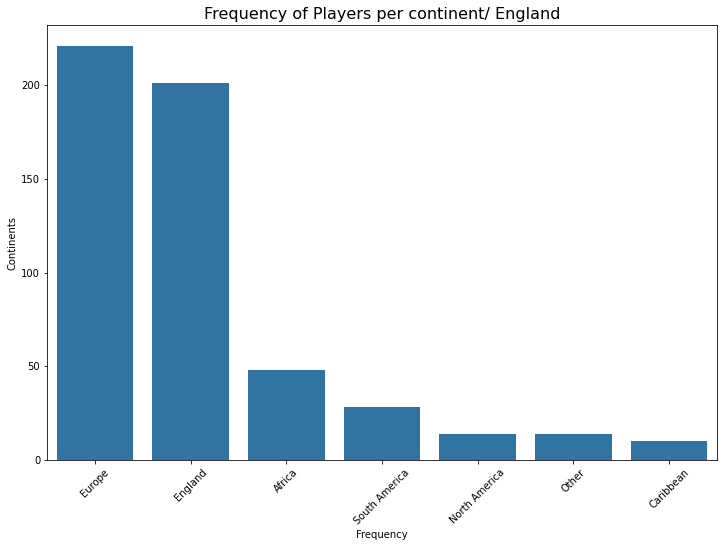

In [ ]:
## Plot for player distribution per continent
continent_counts = merged_df['player_continent'].value_counts().reset_index()
continent_counts.columns = [ 'Continents', 'Frequency']
plt.figure(figsize=(12,8))
sns.barplot(x = 'Continents' , y = 'Frequency', data = continent_counts)
plt.title('Frequency of Players per continent/ England', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Continents')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Distribution of the player_positions
position_count = merged_df['player_position'].value_counts()

In [ ]:
# Market value
min_value = merged_df[ 'player_market_value_euro'].min() #250K
max_value = merged_df[ 'player_market_value_euro'].max() #6.5M

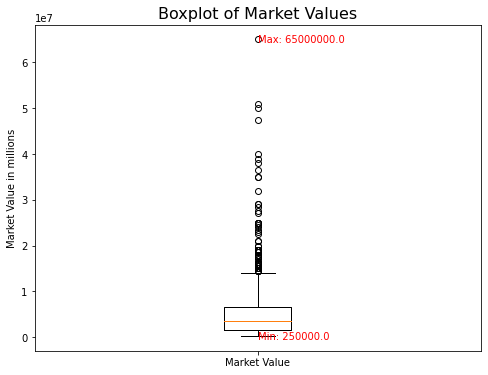

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['player_market_value_euro'])
plt.text(1, min_value, 'Min: ' + str(min_value), ha='left', va='center', color='red')
plt.text(1, max_value, 'Max: ' + str(max_value), ha='left', va='center', color='red')
plt.title('Boxplot of Market Values', fontsize = 16)
plt.ylabel('Market Value in millions')
plt.xticks([1], ['Market Value'])

plt.show()

We see that quite some players have a market value above the upper fence. We should log-transform the market value. After running test models we saw terrible results.

In [ ]:
## We see that there are quite some players which fall above the
## upper whisker of 1.5M

In [ ]:
most_expensive_players = merged_df[merged_df['player_market_value_euro'] > 1500000].shape[0]
# 392 players with a value above the top whisker of the boxplot

In [ ]:
top_10_expensive_players = merged_df.sort_values(by='player_market_value_euro', ascending=False).head(10)

# Selecting the relevant columns
top_10_expensive_players = top_10_expensive_players[['player_name', 'player_position', 'player_nationality', 'player_market_value_euro']]
## Top 10 mostly consists of attacking players; 1 CB, 2 CM and 7 attacking roles
